In [91]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
# create dict 'pbp', contains play by play details from 1999-2019, inclusive
pbp = {}
for YEAR in range(1999, 2020):
    pbp[str(YEAR)] = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                         'play_by_play_' + str(YEAR) + '.csv.gz?raw=True',
                         compression='gzip', low_memory=False)
    print(f'{YEAR} done!')

1999 done!
2000 done!
2001 done!
2002 done!
2003 done!
2004 done!
2005 done!
2006 done!
2007 done!
2008 done!
2009 done!
2010 done!
2011 done!
2012 done!
2013 done!
2014 done!
2015 done!
2016 done!
2017 done!
2018 done!
2019 done!


In [3]:
# select plays with qb dropbacks and known epa values, in neutral game situation

# sanity check:
# print year
# print total # plays in year
# print # dropbacks with an epa value in neutral situations in year
for _ , j in enumerate(pbp):
    YEAR = str(j)
    print(YEAR)
    temp_pbp = pbp[YEAR]
    print(len(temp_pbp))
    pbp[YEAR] = temp_pbp.loc[((temp_pbp.qb_dropback == 1) & 
                              (temp_pbp.epa.isna() == False) &
                              (temp_pbp.wp > 0.2) &
                              (temp_pbp.wp < 0.8))]
    print(len(pbp[YEAR]))
    print()

1999
46137
11027

2000
45492
10822

2001
45435
11644

2002
47819
11823

2003
47335
10982

2004
47203
11380

2005
47344
11094

2006
46868
11418

2007
46789
11465

2008
46445
11561

2009
47083
11208

2010
47467
12061

2011
48200
11829

2012
48578
12105

2013
48878
12693

2014
48418
11829

2015
48869
12737

2016
48419
12307

2017
47997
12595

2018
47874
12015

2019
48034
12164



In [4]:
# playoff dict containing list of teams that made postseason that year
# note that in nflfastR, current team abbrevs are retroactively used 
# e.g. 1999 St. Louis Rams written as 'LA', similar for former Oakland (now 'LV') and San Diego (now 'LAC') teams

playoff = {}

playoff['1999'] = ['BUF', 'DET', 'SEA', 'DAL', 'MIA', 'WAS', 'MIN', 'IND', 'TB', 'JAX', 'TEN', 'LA']
playoff['2000'] = ['IND', 'LA', 'TB', 'DEN', 'NO', 'MIA', 'PHI', 'TEN', 'MIN', 'LV', 'NYG', 'BAL']
playoff['2001'] = ['TB', 'NYJ', 'SF', 'MIA', 'LV', 'CHI', 'BAL', 'GB', 'PIT', 'PHI', 'LA', 'NE']
playoff['2002'] = ['GB', 'IND', 'CLE', 'NYG', 'PIT', 'ATL', 'NYJ', 'SF', 'TEN', 'PHI', 'LV', 'TB']
playoff['2003'] = ['DAL', 'BAL', 'DEN', 'SEA', 'TEN', 'LA', 'GB', 'KC', 'IND', 'PHI', 'CAR', 'NE']
playoff['2004'] = ['LAC', 'SEA', 'DEN', 'GB', 'LA', 'NYJ', 'IND', 'MIN', 'PIT', 'ATL', 'PHI', 'NE']
playoff['2005'] = ['JAX', 'TB', 'NYG', 'CIN', 'NE', 'WAS', 'CHI', 'IND', 'CAR', 'DEN', 'SEA', 'PIT']
playoff['2006'] = ['KC', 'DAL', 'NYJ', 'NYG', 'PHI', 'BAL', 'SEA', 'LAC', 'NO', 'NE', 'CHI', 'IND']
playoff['2007'] = ['PIT', 'WAS', 'TB', 'TEN', 'SEA', 'JAX', 'DAL', 'IND', 'LAC', 'GB', 'NE', 'NYG']
playoff['2008'] = ['ATL', 'IND', 'MIN', 'MIA', 'CAR', 'TEN', 'LAC', 'NYG', 'BAL', 'PHI', 'ARI', 'PIT']
playoff['2009'] = ['PHI', 'CIN', 'GB', 'NE', 'BAL', 'ARI', 'DAL', 'LAC', 'NYJ', 'MIN', 'IND', 'NO']
playoff['2010'] = ['IND', 'NO', 'PHI', 'KC', 'BAL', 'ATL', 'SEA', 'NE', 'NYJ', 'CHI', 'PIT', 'GB']
playoff['2011'] = ['CIN', 'DET', 'PIT', 'ATL', 'DEN', 'NO', 'HOU', 'GB', 'BAL', 'SF', 'NE', 'NYG']
playoff['2012'] = ['MIN', 'CIN', 'IND', 'WAS', 'GB', 'DEN', 'SEA', 'HOU', 'ATL', 'NE', 'SF', 'BAL']
playoff['2013'] = ['KC', 'PHI', 'CIN', 'GB', 'IND', 'NO', 'LAC', 'CAR', 'NE', 'SF', 'DEN', 'SEA']
playoff['2014'] = ['ARI', 'PIT', 'CIN', 'DET', 'BAL', 'CAR', 'DAL', 'DEN', 'IND', 'GB', 'SEA', 'NE']
playoff['2015'] = ['HOU', 'CIN', 'WAS', 'MIN', 'GB', 'KC', 'SEA', 'PIT', 'ARI', 'NE', 'CAR', 'DEN']
playoff['2016'] = ['LV', 'DET', 'NYG', 'MIA', 'SEA', 'HOU', 'DAL', 'KC', 'GB', 'PIT', 'ATL', 'NE']
playoff['2017'] = ['LA', 'KC', 'BUF', 'CAR', 'TEN', 'ATL', 'NO', 'PIT', 'JAX', 'MIN', 'NE', 'PHI']
playoff['2018'] = ['HOU', 'SEA', 'CHI', 'BAL', 'IND', 'DAL', 'PHI', 'LAC', 'KC', 'NO', 'LA', 'NE']
playoff['2019'] = ['BUF', 'NE', 'NO', 'PHI', 'MIN', 'BAL', 'SEA', 'HOU', 'TEN', 'GB', 'SF', 'KC']

In [31]:
# pbp_playoff dict containing regular season plays vs playoff teams (includes postseason plays)
# pbp_notplayoff dict containing plays against non-playoff teams
 
pbp_playoff = {}
pbp_notplayoff = {}

# print year
# print num of selected plays
# print num that are against playoff teams
# print num that are not against playoff teams
for _ , j in enumerate(pbp):
    print(j)
    print(len(pbp[j]))
    pbp_playoff[j] = pbp[j].loc[(pbp[j].defteam.isin(playoff[j]))]
    pbp_notplayoff[j] = pbp[j].loc[~(pbp[j].defteam.isin(playoff[j]))]
    print(len(pbp_playoff[j]))
    print(len(pbp_notplayoff[j]))
    print()

1999
11027
4519
6508

2000
10822
4379
6443

2001
11644
4744
6900

2002
11823
4456
7367

2003
10982
4444
6538

2004
11380
4233
7147

2005
11094
4512
6582

2006
11418
4444
6974

2007
11465
4482
6983

2008
11561
4824
6737

2009
11208
4205
7003

2010
12061
4893
7168

2011
11829
4946
6883

2012
12105
4685
7420

2013
12693
4756
7937

2014
11829
4465
7364

2015
12737
4813
7924

2016
12307
4957
7350

2017
12595
5011
7584

2018
12015
4967
7048

2019
12164
4933
7231



In [32]:
# testing out groupby function on 2019 data against playoff teams
# filter to only select qbs with > 50 plays
temp = pbp_playoff['2019'].groupby('passer', as_index=False).agg({'epa': 'mean',
                                                                 'play_id': 'count'})
temp = temp[temp.play_id > 75]
temp

,passer,epa,play_id
0,A.Dalton,-0.017793,119
2,A.Rodgers,0.070536,165
5,B.Mayfield,0.009595,163
12,C.Wentz,-0.132399,127
15,D.Brees,0.118334,129
16,D.Carr,0.263647,99
19,D.Jones,-0.108440,101
21,D.Prescott,-0.028954,162
22,D.Watson,0.230878,163
24,G.Minshew II,-0.127901,102


In [33]:
for i in range(len(temp)):
    player = temp.iloc[i]['passer']
    print(player)

A.Dalton
A.Rodgers
B.Mayfield
C.Wentz
D.Brees
D.Carr
D.Jones
D.Prescott
D.Watson
G.Minshew II
J.Allen
J.Brissett
J.Garoppolo
J.Goff
J.Winston
K.Allen
K.Cousins
K.Murray
L.Jackson
M.Ryan
M.Stafford
M.Trubisky
P.Mahomes
P.Rivers
R.Fitzpatrick
R.Tannehill
R.Wilson
T.Brady


In [34]:
float(temp.loc[temp.passer == 'A.Dalton'].epa)

-0.01779345747127862

In [35]:
# testing out a way to see if a passer is in a dataframe
print(len(temp.loc[temp.passer=='A.Dalton']))
print(len(temp.loc[temp.passer=='B.Dalton']))

1
0


In [36]:
# convert pbp_playoff to show mean epa and num dropbacks for a given passer
for _ , YEAR in enumerate(pbp_playoff):
    pbp_playoff[YEAR] = pbp_playoff[YEAR].groupby('passer', as_index=False).agg({'epa': 'mean',
                                                                                 'play_id': 'count'})
    pbp_playoff[YEAR] = pbp_playoff[YEAR][pbp_playoff[YEAR].play_id > 75]

In [37]:
# convert pbp_notplayoff to show mean epa and num dropbacks for a given passer
for _ , YEAR in enumerate(pbp_notplayoff):
    pbp_notplayoff[YEAR] = pbp_notplayoff[YEAR].groupby('passer', as_index=False).agg({'epa': 'mean',
                                                                                       'play_id': 'count'})
    pbp_notplayoff[YEAR] = pbp_notplayoff[YEAR][pbp_notplayoff[YEAR].play_id > 75]

In [38]:
# create dataframe 'data' that contains passer, year, playoff epa, nonplayoff epa, # total dropbacks

arr = []

for i in range(1999, 2020):
    YEAR = str(i)
    for player_num in range(len(pbp_playoff[YEAR])):
        player = pbp_playoff[YEAR].iloc[player_num]['passer']
        # if this player is not in the 'pbp_not_playoff[YEAR]' dataframe, then continue to next player
        if len(pbp_notplayoff[YEAR].loc[pbp_notplayoff[YEAR].passer == player]) == 0:
            continue
        else:
            playoff_epa = float(pbp_playoff[YEAR].loc[pbp_playoff[YEAR].passer == player].epa)
            nonplayoff_epa = float(pbp_notplayoff[YEAR].loc[pbp_notplayoff[YEAR].passer == player].epa)
            dropbacks = int(pbp_playoff[YEAR].loc[pbp_playoff[YEAR].passer == player].play_id) + \
                        int(pbp_notplayoff[YEAR].loc[pbp_notplayoff[YEAR].passer == player].play_id)
            row = [player, YEAR, playoff_epa, nonplayoff_epa, dropbacks]
            arr.append(row)

data = pd.DataFrame(arr, columns = ['passer', 'year', 'playoff EPA', 'nonplayoff EPA', 'dropbacks'])

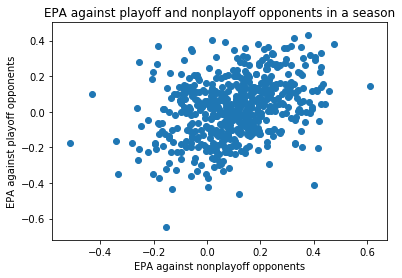

In [39]:
plt.title('EPA against playoff and nonplayoff opponents in a season')
plt.xlabel('EPA against nonplayoff opponents')
plt.ylabel('EPA against playoff opponents')
plt.scatter(data['nonplayoff EPA'], data['playoff EPA']);

In [40]:
from scipy import stats
import numpy as np

In [41]:
x = np.asarray(data['nonplayoff EPA'])
y = np.asarray(data['playoff EPA'])
m, b, r, p, std_error = stats.linregress(x,y)

In [42]:
print(m, b)

0.36557017285783705 -0.021202808579189887


In [43]:
# R2 went from ~0.20 to 0.10 when excluding garbage time plays (lowered sample size cutoff 75-->50)
r**2

0.11482469433056476

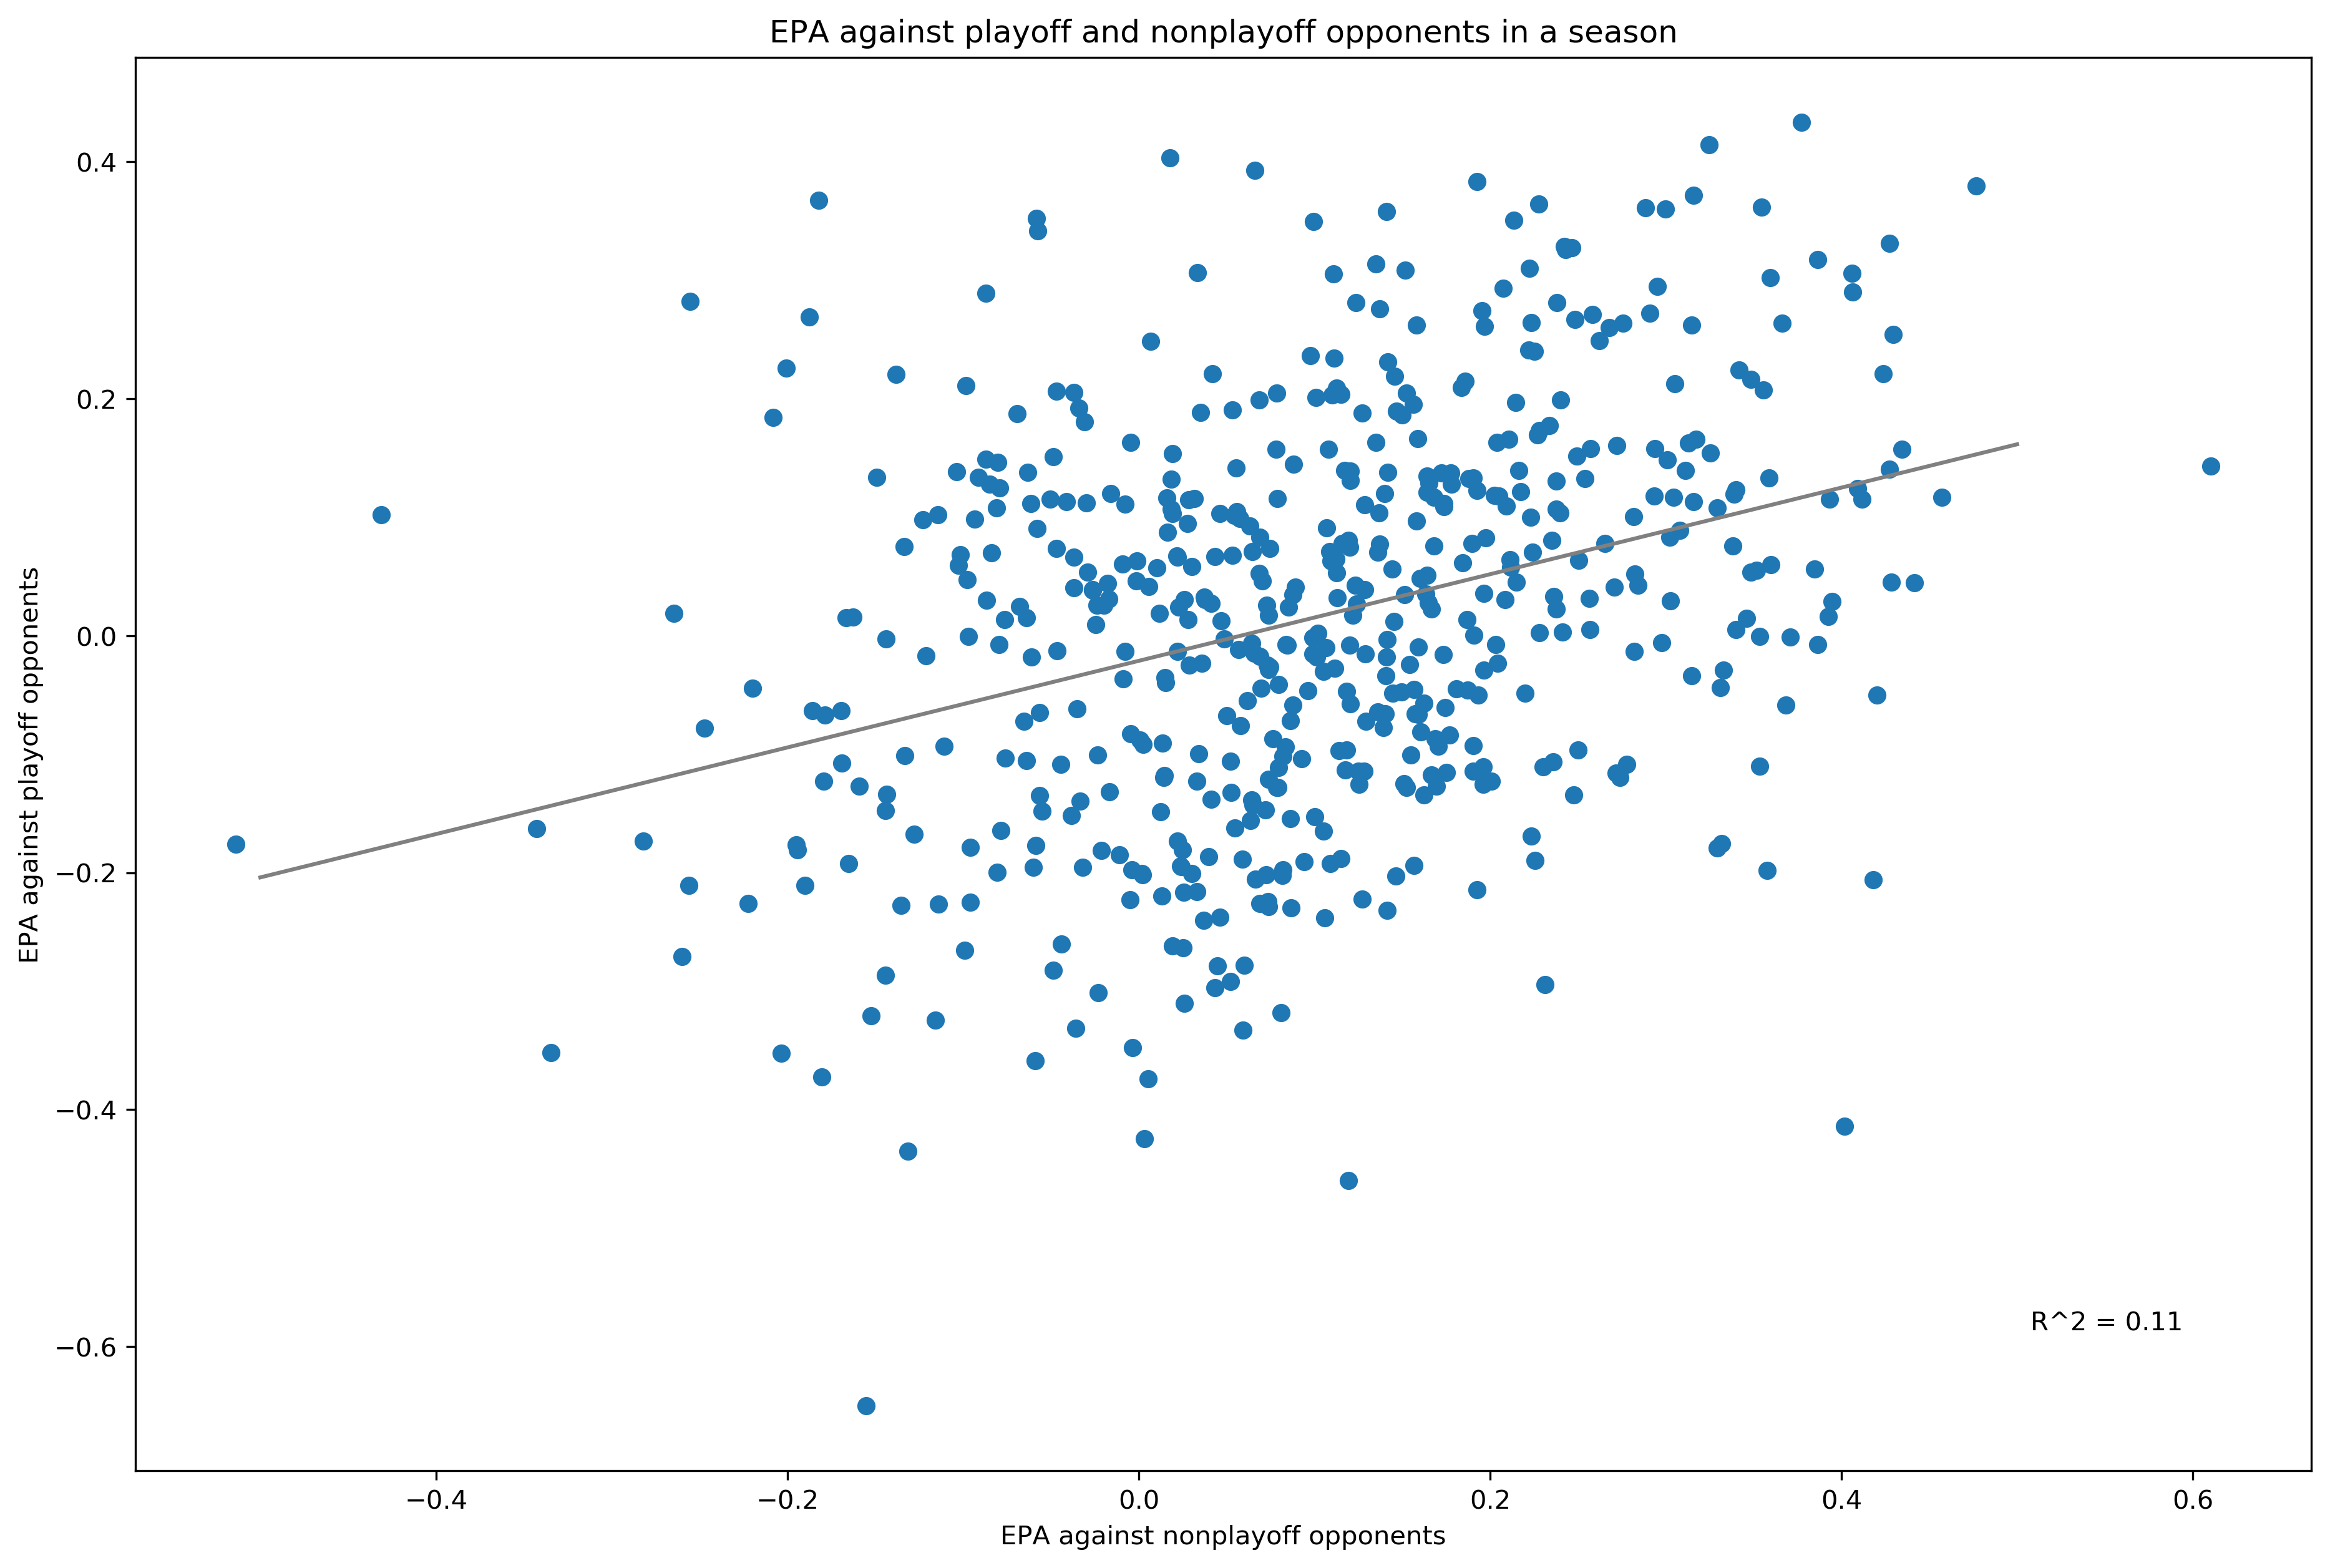

In [57]:
x = np.linspace(-0.5, 0.6)
y = (m * x) + b 
plt.figure(figsize=(15,10), dpi=300)
plt.title('EPA against playoff and nonplayoff opponents in a season')
plt.xlabel('EPA against nonplayoff opponents')
plt.ylabel('EPA against playoff opponents')
plt.plot(x, y, color='gray');
plt.figtext(0.8, 0.2, f'R^2 = {r**2:0.2f}', fontsize=10);
plt.scatter(data['nonplayoff EPA'], data['playoff EPA']);

In [44]:
# find passers + years with highest and lowest residuals (biggest outliers from the linreg line)
# just for fun lol
resid_low = 0
resid_low_index = None
resid_high = 0
resid_high_index = None

for i in range(len(x)):
    resid = y[i] - (m*x[i] + b)
    if resid < resid_low:
        resid_low = resid
        resid_low_index = i
    elif resid > resid_high:
        resid_high = resid
        resid_high_index = i

In [45]:
data.iloc[resid_low_index]

passer            J.Plummer
year                   1999
playoff EPA       -0.650084
nonplayoff EPA    -0.155206
dropbacks               188
Name: 12, dtype: object

In [46]:
data.iloc[resid_high_index]

passer             N.Foles
year                  2017
playoff EPA        0.36758
nonplayoff EPA   -0.182286
dropbacks              176
Name: 490, dtype: object

In [47]:
data.loc[data.passer == 'D.Prescott']

,passer,year,playoff EPA,nonplayoff EPA,dropbacks
452,D.Prescott,2016,0.002486,0.228112,395
478,D.Prescott,2017,0.012445,0.046943,373
508,D.Prescott,2018,0.121768,0.217373,438
531,D.Prescott,2019,-0.028954,0.332792,347


In [48]:
data.loc[data.passer=='C.Wentz']

,passer,year,playoff EPA,nonplayoff EPA,dropbacks
449,C.Wentz,2016,0.068634,-0.101472,414
474,C.Wentz,2017,0.263576,0.275756,306
505,C.Wentz,2018,-0.093434,0.170688,295
527,C.Wentz,2019,-0.132399,0.052577,428


In [58]:
data.loc[data.passer=='R.Wilson']

,passer,year,playoff EPA,nonplayoff EPA,dropbacks
360,R.Wilson,2012,0.077568,0.137095,401
386,R.Wilson,2013,0.236431,0.097609,369
412,R.Wilson,2014,0.203137,0.110140,372
435,R.Wilson,2015,0.139276,0.216417,361
462,R.Wilson,2016,0.162932,0.134977,427
492,R.Wilson,2017,-0.197340,0.082135,473
522,R.Wilson,2018,0.109312,0.209288,377
550,R.Wilson,2019,0.053690,0.348329,433


In [59]:
data.loc[data.passer=='T.Romo']

,passer,year,playoff EPA,nonplayoff EPA,dropbacks
211,T.Romo,2006,-0.000862,0.353262,287
234,T.Romo,2007,0.392611,0.066188,434
260,T.Romo,2008,-0.045487,0.156574,298
283,T.Romo,2009,0.293247,0.207297,403
336,T.Romo,2011,0.132471,0.187977,338
363,T.Romo,2012,-0.065856,0.157360,462
388,T.Romo,2013,0.157245,0.078094,390
415,T.Romo,2014,0.302160,0.359582,308


In [71]:
data.loc[data.passer=='A.Rodgers']

,passer,year,playoff EPA,nonplayoff EPA,dropbacks
236,A.Rodgers,2008,0.106692,0.237635,424
262,A.Rodgers,2009,0.014713,0.345864,374
284,A.Rodgers,2010,0.261077,0.196712,470
311,A.Rodgers,2011,0.290132,0.406368,349
339,A.Rodgers,2012,0.163386,0.204075,419
366,A.Rodgers,2013,0.207497,0.355466,250
391,A.Rodgers,2014,0.216484,0.348469,395
417,A.Rodgers,2015,-0.066309,0.159315,443
442,A.Rodgers,2016,0.358043,0.141209,503
498,A.Rodgers,2018,0.141505,0.055467,381


In [90]:
len(data)

552

In [67]:
float(data.loc[(data.year=='2019') & (data.passer=='D.Prescott')]['playoff EPA'])

-0.028954410284095778

In [95]:
# how well does playoff performance in year n correlate with playoff performance in year n+1?
x1 = []
y1 = []
for i in range(len(data)):
    player = data.iloc[i]['passer']
    year_n = data.iloc[i]['year']
    playoff_n = data.iloc[i]['playoff EPA']
    year_nplusone = str(int(year_n) + 1)
    # first see if n+1 is even in df
    if len(data.loc[(data.year == year_nplusone) & (data.passer == player)]) == 0:
        continue
    else:
        playoff_nplusone = float(data.loc[(data.year == year_nplusone) & (data.passer == player)]['playoff EPA'])
        x1.append(playoff_n)
        y1.append(playoff_nplusone)

In [96]:
m1, b1, r1, p, std_error = stats.linregress(x1, y1)
print(m, b)
print(r1**2)

0.27916363308913955 0.0329457485297552
0.039573766942821643


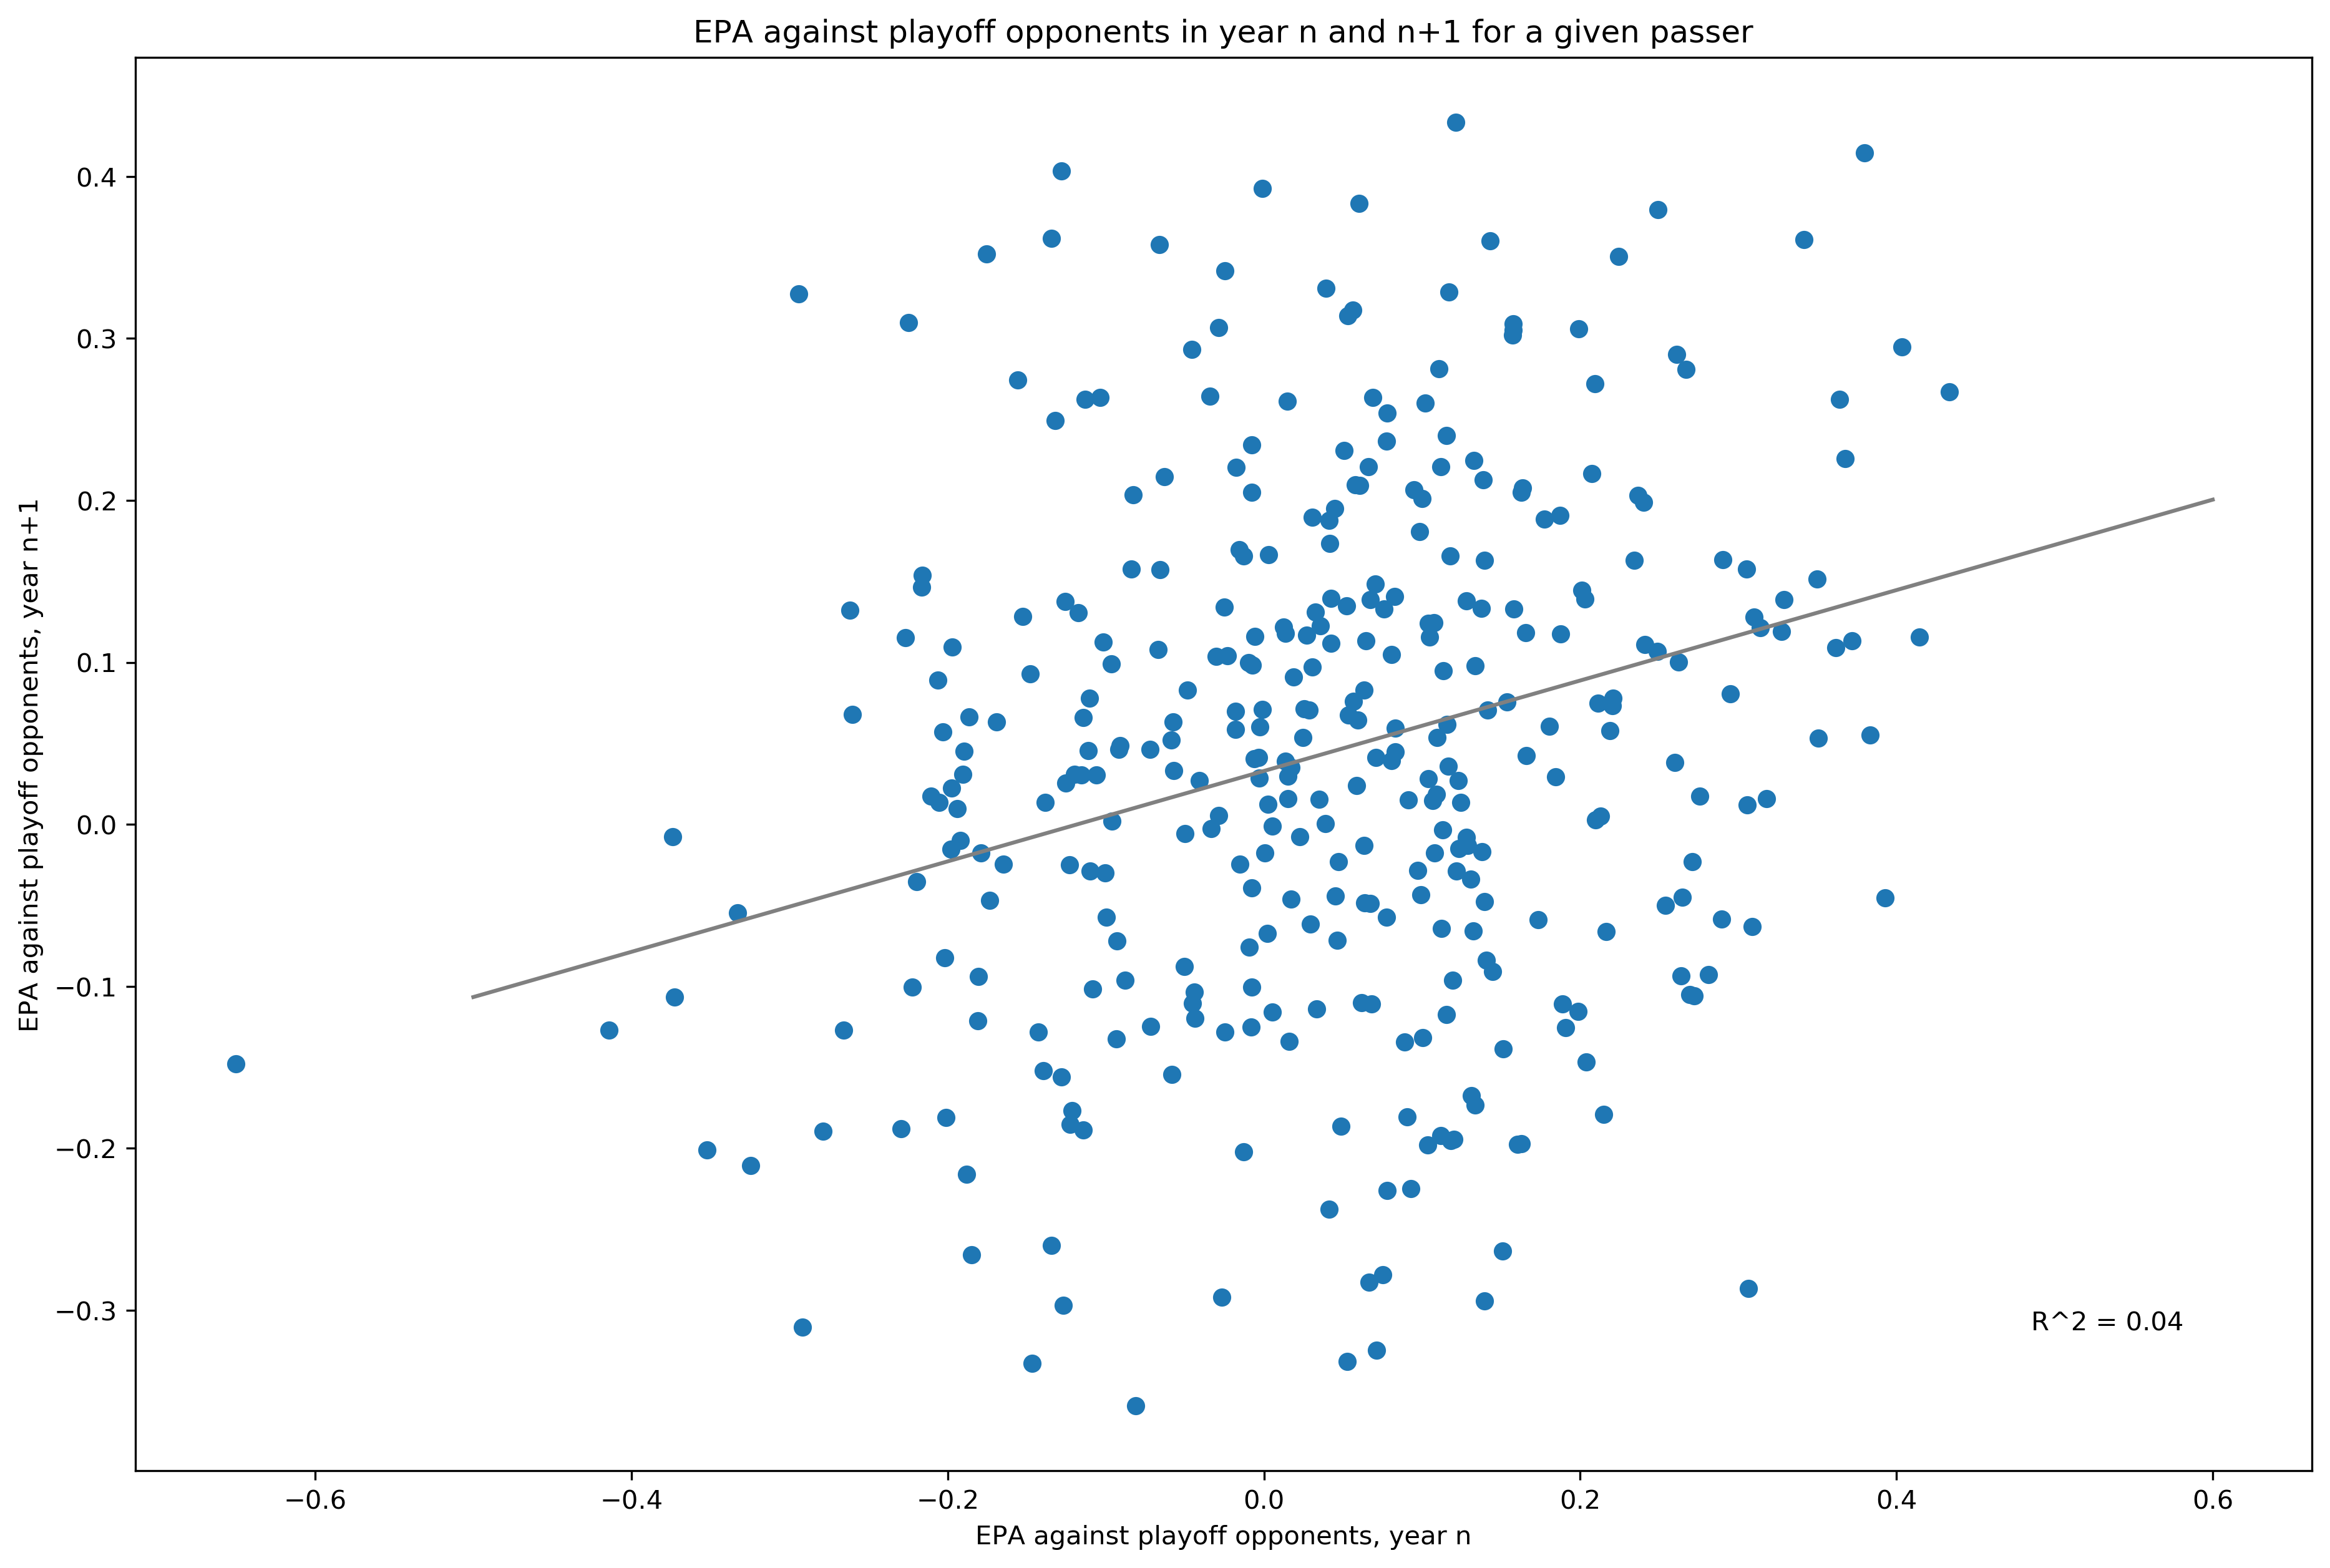

In [97]:
x_linreg = np.linspace(-0.5, 0.6)
y_linreg = (m * x_linreg) + b 
plt.figure(figsize=(15,10), dpi=300)
plt.title('EPA against playoff opponents in year n and n+1 for a given passer')
plt.xlabel('EPA against playoff opponents, year n')
plt.ylabel('EPA against playoff opponents, year n+1')
plt.plot(x_linreg, y_linreg, color='gray');
plt.figtext(0.8, 0.2, f'R^2 = {r1**2:0.2f}', fontsize=10);
plt.scatter(x1, y1);

In [98]:
# how well does nonplayoff performance in year n correlate with playoff performance in year n+1?
x2 = []
y2 = []
for i in range(len(data)):
    player = data.iloc[i]['passer']
    year_n = data.iloc[i]['year']
    nonplayoff_n = data.iloc[i]['nonplayoff EPA']
    year_nplusone = str(int(year_n) + 1)
    # first see if n+1 is even in df
    if len(data.loc[(data.year == year_nplusone) & (data.passer == player)]) == 0:
        continue
    else:
        playoff_nplusone = float(data.loc[(data.year == year_nplusone) & (data.passer == player)]['playoff EPA'])
        x2.append(nonplayoff_n)
        y2.append(playoff_nplusone)

In [99]:
m2, b2, r2, p, std_error = stats.linregress(x2,y2)
print(m2, b2)
print(r2**2)

0.17624124795289722 0.01952260543470709
0.02674301077597275


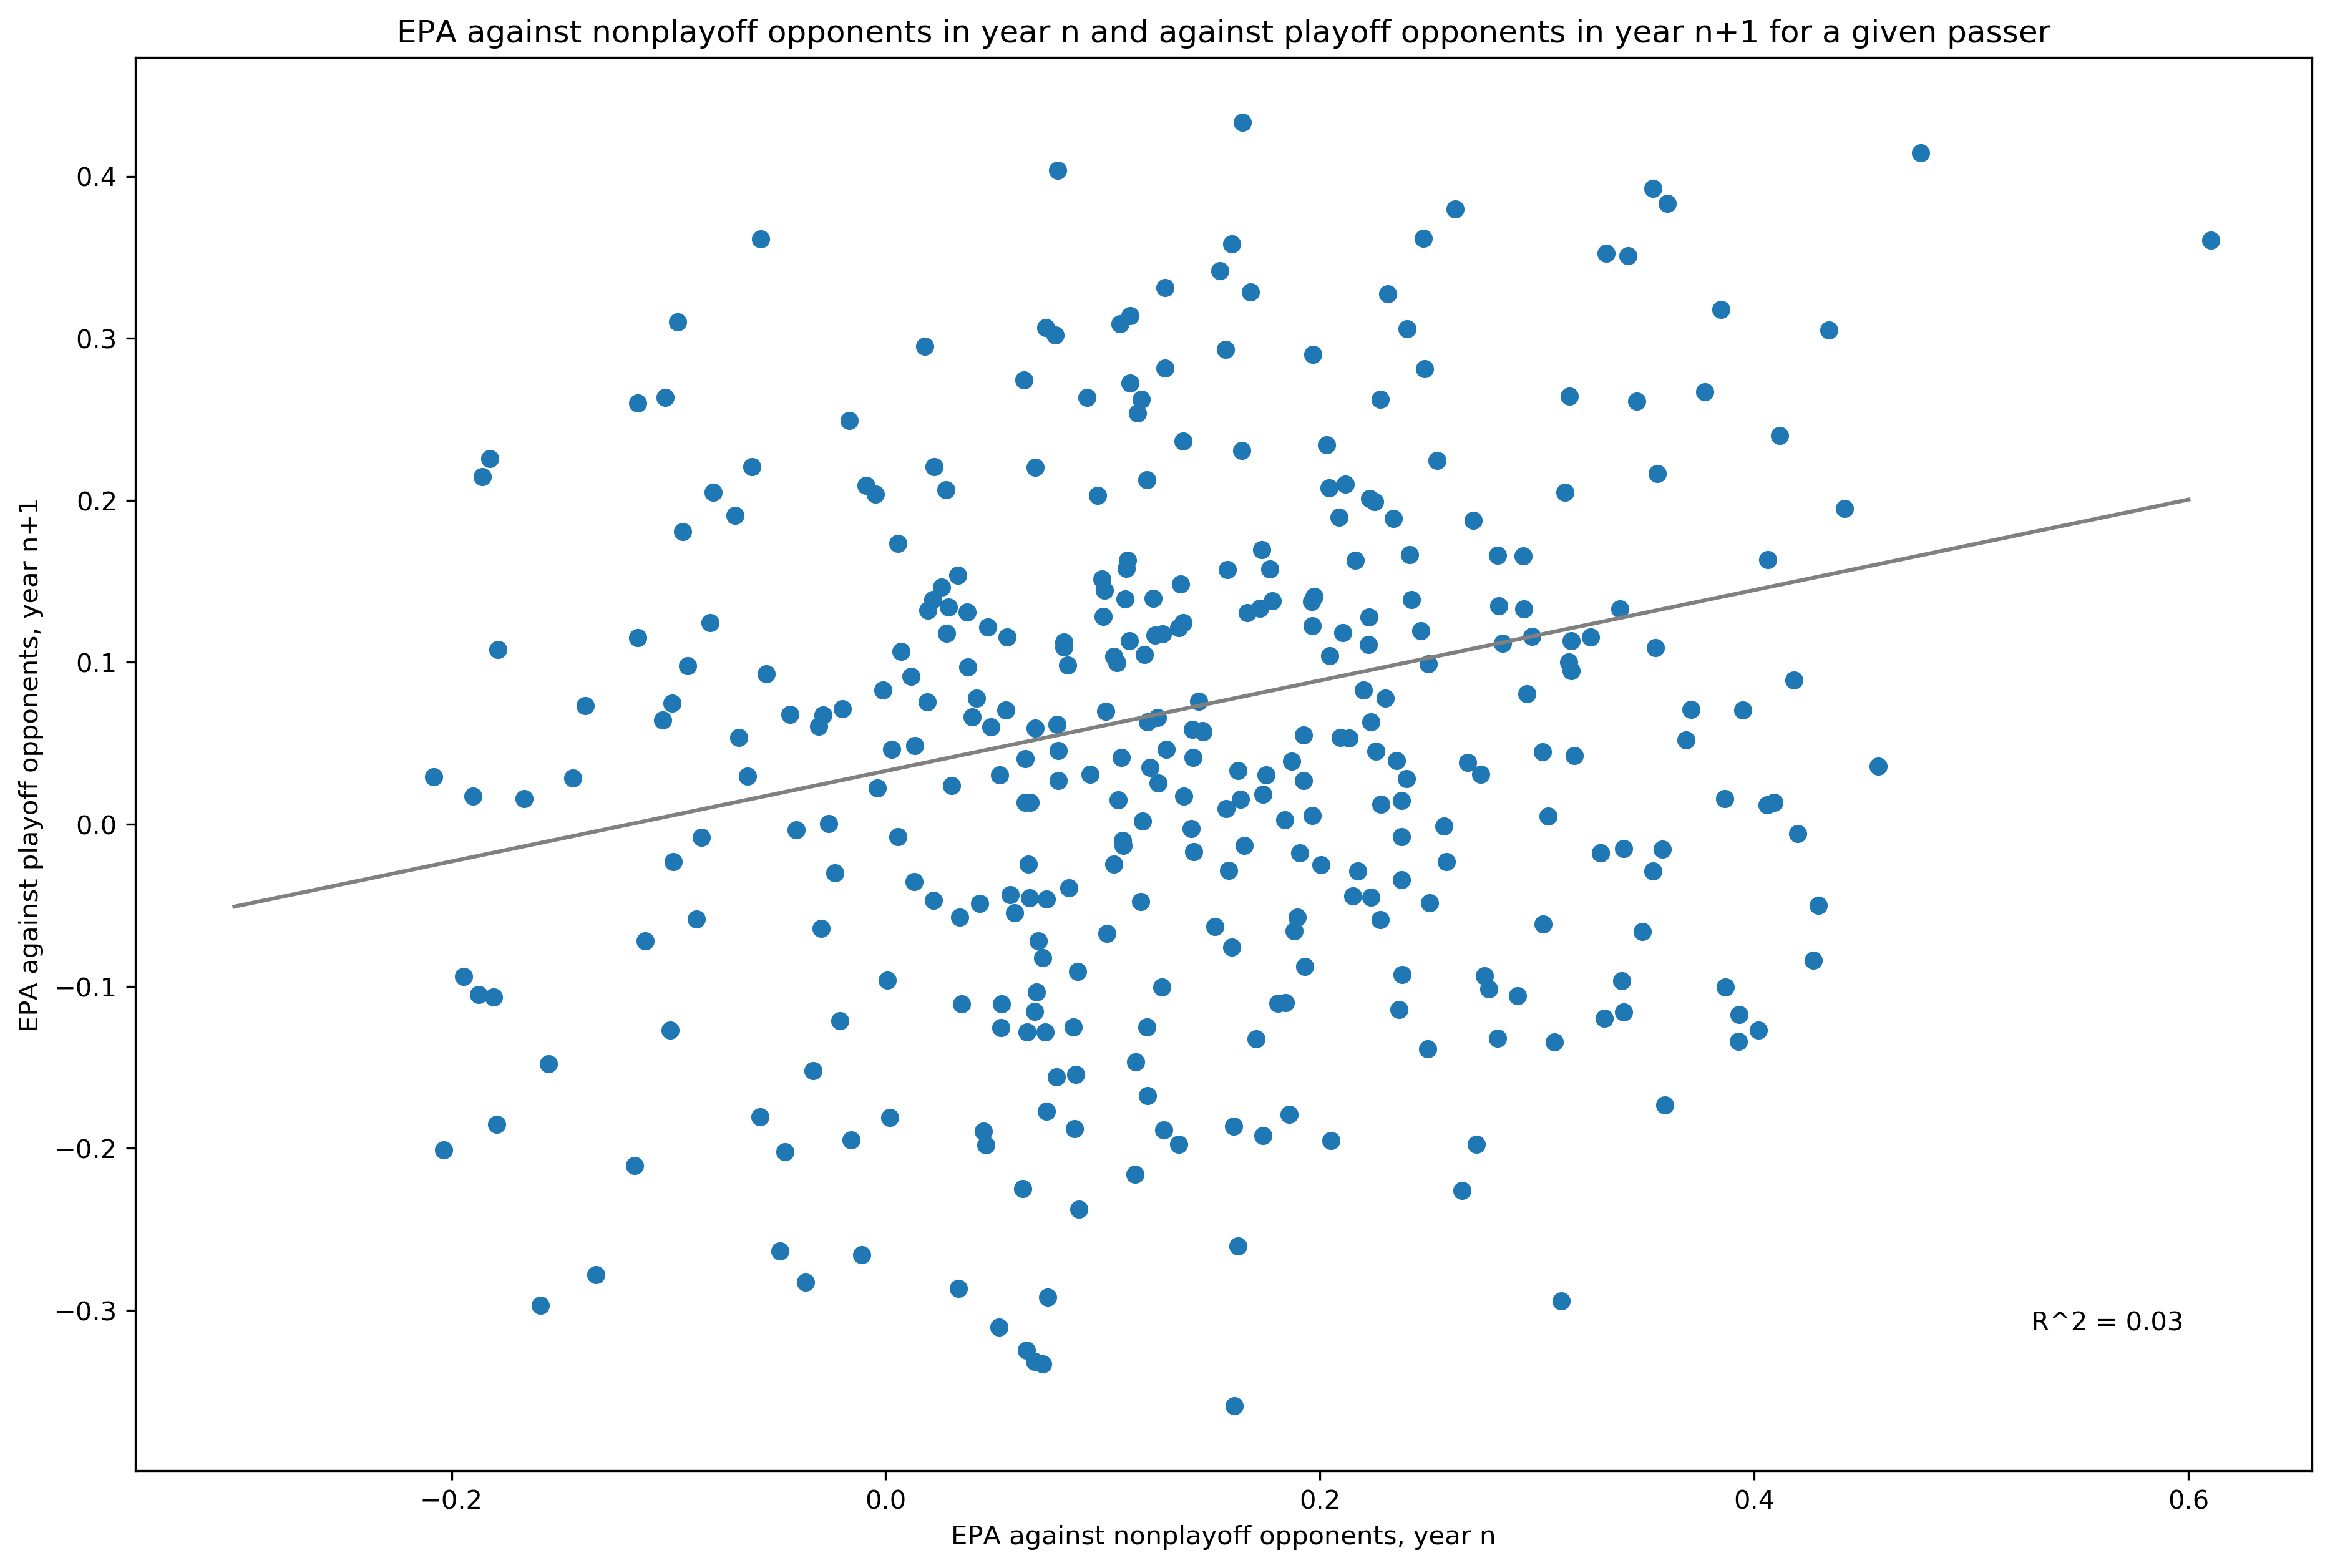

In [100]:
x_linreg = np.linspace(-0.3, 0.6)
y_linreg = (m * x_linreg) + b 
plt.figure(figsize=(15,10), dpi=300)
plt.title('EPA against nonplayoff opponents in year n and against playoff opponents in year n+1 for a given passer')
plt.xlabel('EPA against nonplayoff opponents, year n')
plt.ylabel('EPA against playoff opponents, year n+1')
plt.plot(x_linreg, y_linreg, color='gray');
plt.figtext(0.8, 0.2, f'R^2 = {r2**2:0.2f}', fontsize=10);
plt.scatter(x2, y2);

In [80]:
# okay, now lets see if playoff or nonplayoff plays are better able to predict overall performance in year n+1

# convert pbp to show mean epa and num dropbacks for a given passer
for _ , YEAR in enumerate(pbp):
    pbp[YEAR] = pbp[YEAR].groupby('passer', as_index=False).agg({'epa': 'mean',
                                                                 'play_id': 'count'})
    pbp[YEAR] = pbp[YEAR][pbp[YEAR].play_id > 75]

In [81]:
pbp['2019']

,passer,epa,play_id
1,A.Dalton,-0.043461,293
5,A.Rodgers,0.158774,388
10,B.Mayfield,-0.008329,344
13,C.Keenum,-0.147415,120
18,C.Wentz,-0.002311,428
20,D.Blough,-0.247806,88
21,D.Brees,0.162700,273
22,D.Carr,0.333667,313
24,D.Haskins,-0.207764,133
25,D.Hodges,-0.088348,118


In [101]:
# how well does playoff performance in year n correlate with overall performance in year n+1?
x3 = []
y3 = []
for i in range(len(data)):
    player = data.iloc[i]['passer']
    year_n = data.iloc[i]['year']
    playoff_n = data.iloc[i]['playoff EPA']
    year_nplusone = str(int(year_n) + 1)
    # first see if n+1 is even in df
    if year_nplusone == '2020':
        continue
    if len(pbp[year_nplusone].loc[pbp[year_nplusone]['passer'] == player]) == 0:
        continue
    else:
        overall_nplusone = float(pbp[year_nplusone].loc[pbp[year_nplusone]['passer'] == player]['epa'])
        x3.append(playoff_n)
        y3.append(overall_nplusone)

In [102]:
m3, b3, r3, p, std_error = stats.linregress(x3,y3)
print(m3, b3)
print(r3**2)

0.22835900196691328 0.06041135733492556
0.08159890288603659


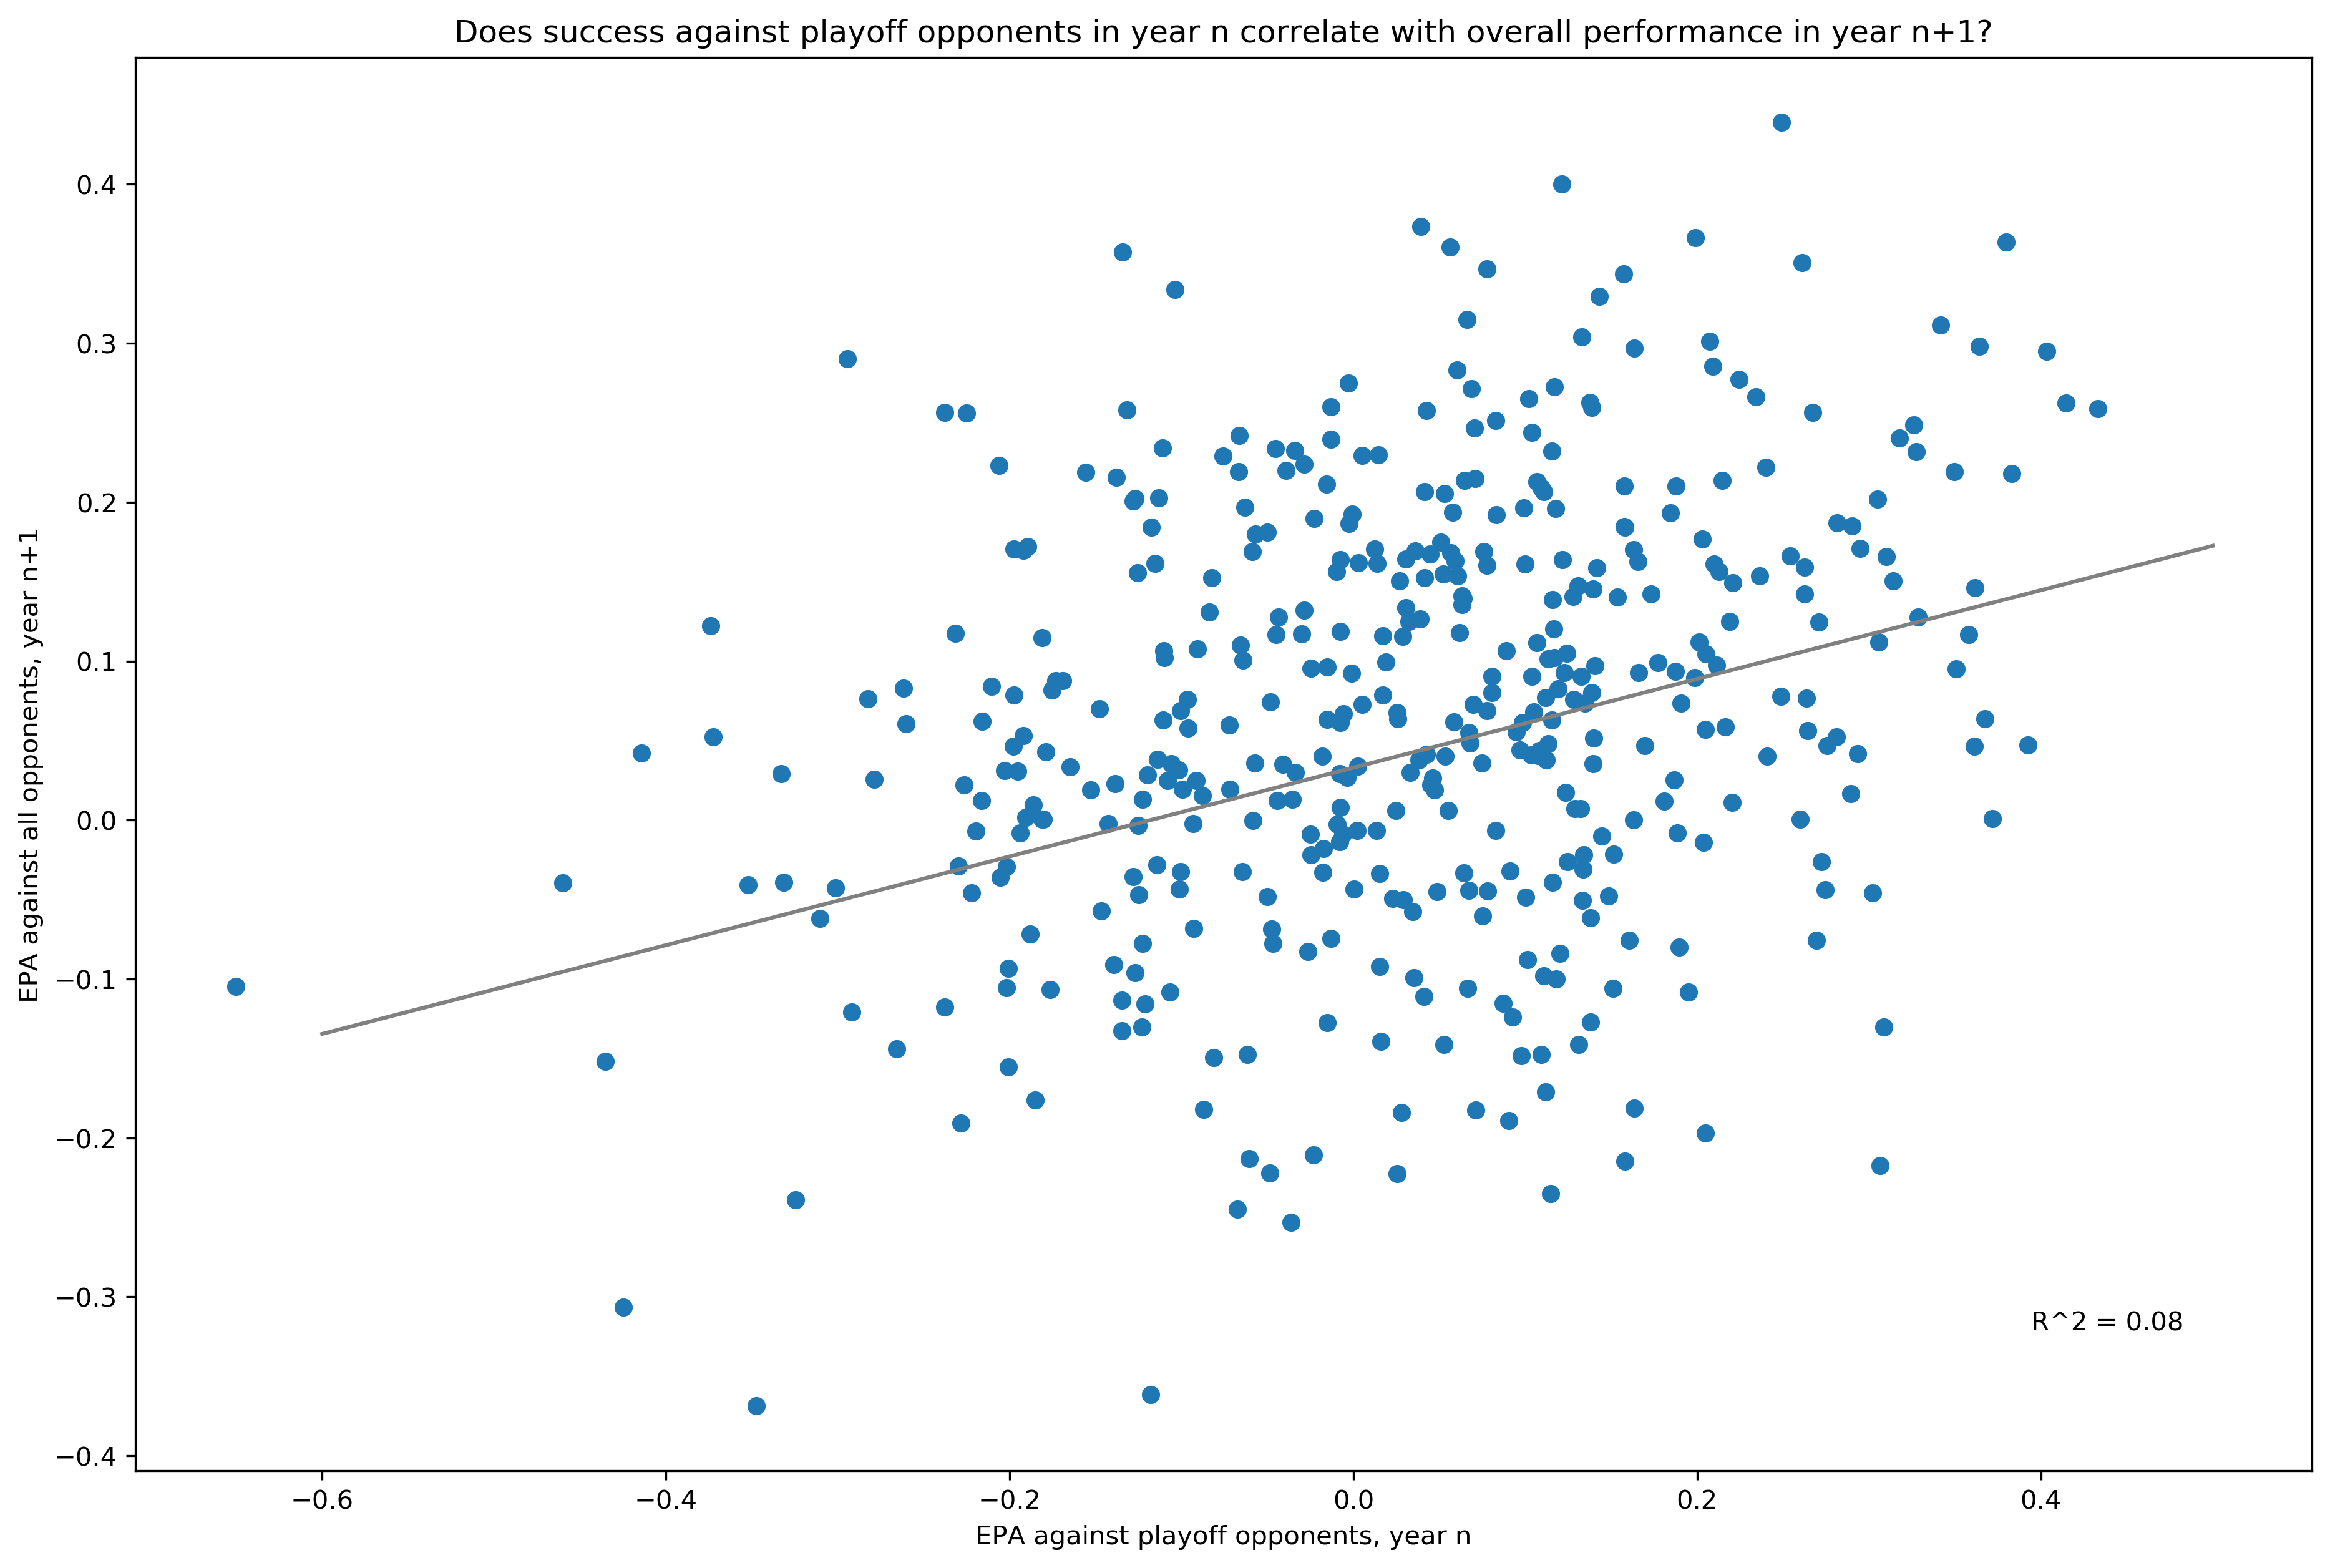

In [103]:
x_linreg = np.linspace(-0.6, 0.5)
y_linreg = (m * x_linreg) + b 
plt.figure(figsize=(15,10), dpi=300)
plt.title('Does success against playoff opponents in year n correlate with overall performance in year n+1?')
plt.xlabel('EPA against playoff opponents, year n')
plt.ylabel('EPA against all opponents, year n+1')
plt.plot(x_linreg, y_linreg, color='gray');
plt.figtext(0.8, 0.2, f'R^2 = {r3**2:0.2f}', fontsize=10);
plt.scatter(x3, y3);

In [104]:
# how well does nonplayoff performance in year n correlate with overall performance in year n+1?
x4 = []
y4 = []
for i in range(len(data)):
    player = data.iloc[i]['passer']
    year_n = data.iloc[i]['year']
    nonplayoff_n = data.iloc[i]['nonplayoff EPA']
    year_nplusone = str(int(year_n) + 1)
    # first see if n+1 is even in df
    if year_nplusone == '2020':
        continue
    if len(pbp[year_nplusone].loc[pbp[year_nplusone]['passer'] == player]) == 0:
        continue
    else:
        overall_nplusone = float(pbp[year_nplusone].loc[pbp[year_nplusone]['passer'] == player]['epa'])
        x4.append(nonplayoff_n)
        y4.append(overall_nplusone)

In [105]:
m4, b4, r4, p, std_error = stats.linregress(x4,y4)
print(m4, b4)
print(r4**2)

0.27916363308913955 0.0329457485297552
0.08862308635828134


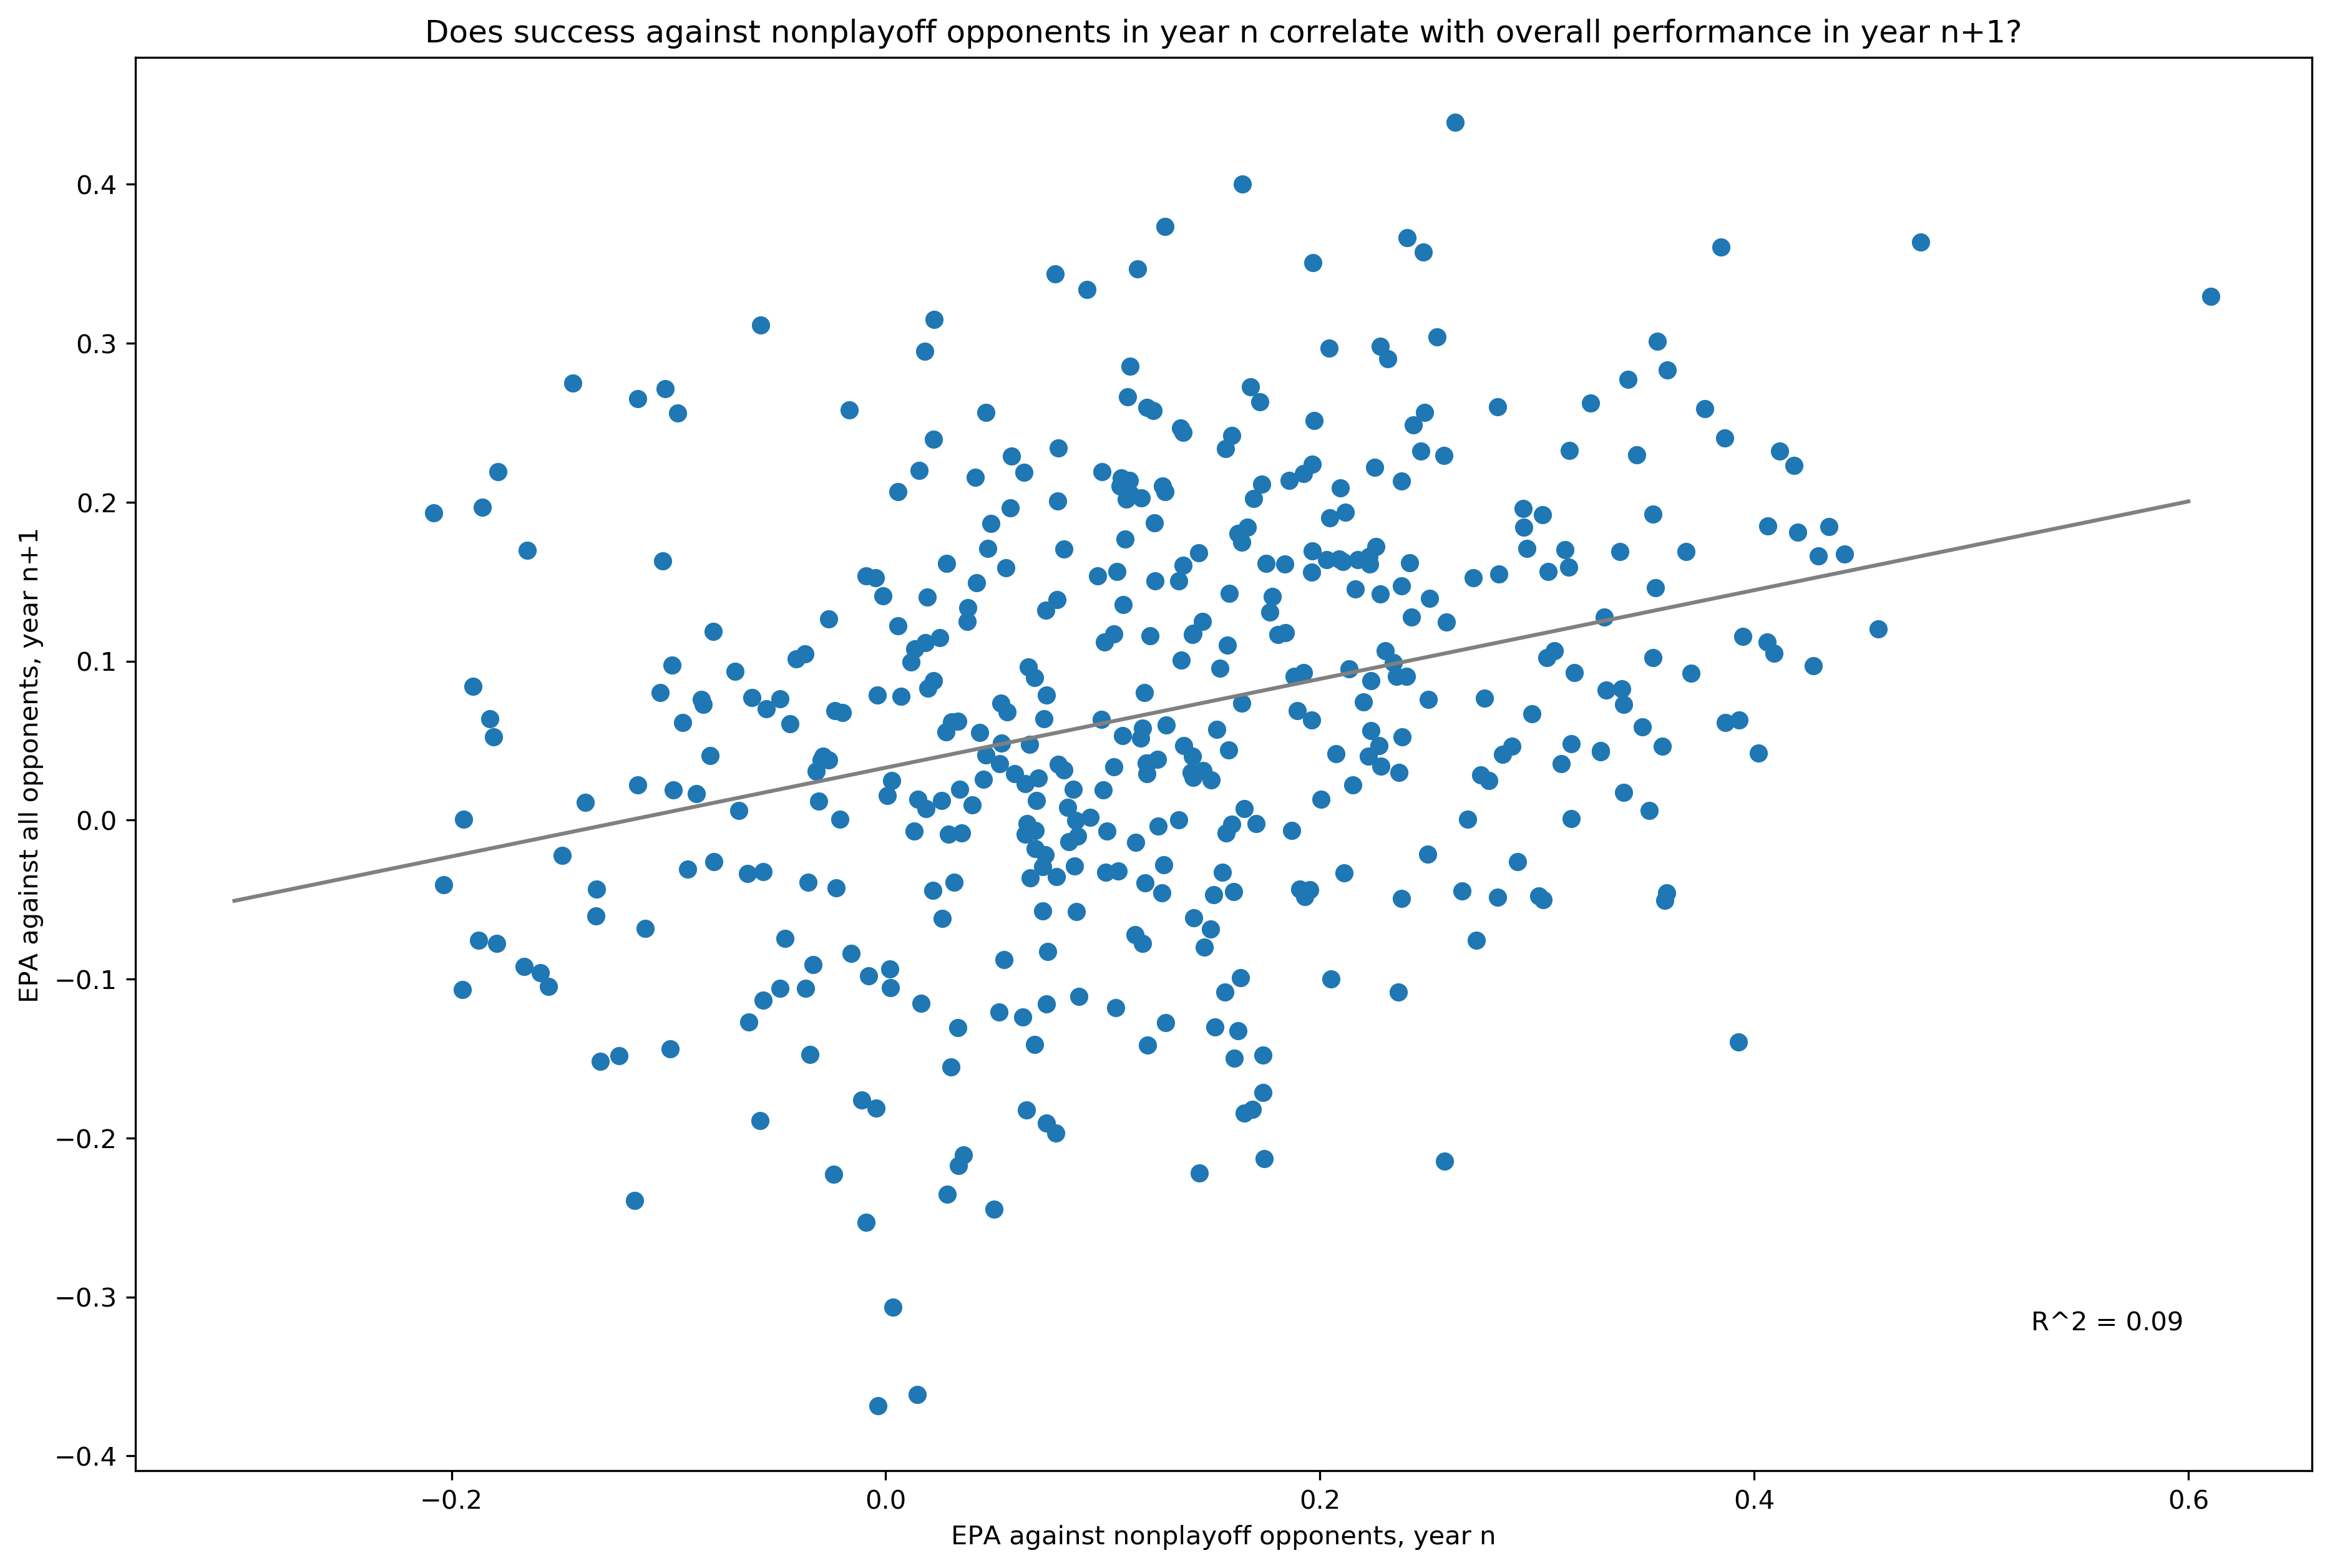

In [106]:
x_linreg = np.linspace(-0.3, 0.6)
y_linreg = (m * x_linreg) + b 
plt.figure(figsize=(15,10), dpi=300)
plt.title('Does success against nonplayoff opponents in year n correlate with overall performance in year n+1?')
plt.xlabel('EPA against nonplayoff opponents, year n')
plt.ylabel('EPA against all opponents, year n+1')
plt.plot(x_linreg, y_linreg, color='gray');
plt.figtext(0.8, 0.2, f'R^2 = {r4**2:0.2f}', fontsize=10);
plt.scatter(x4, y4);

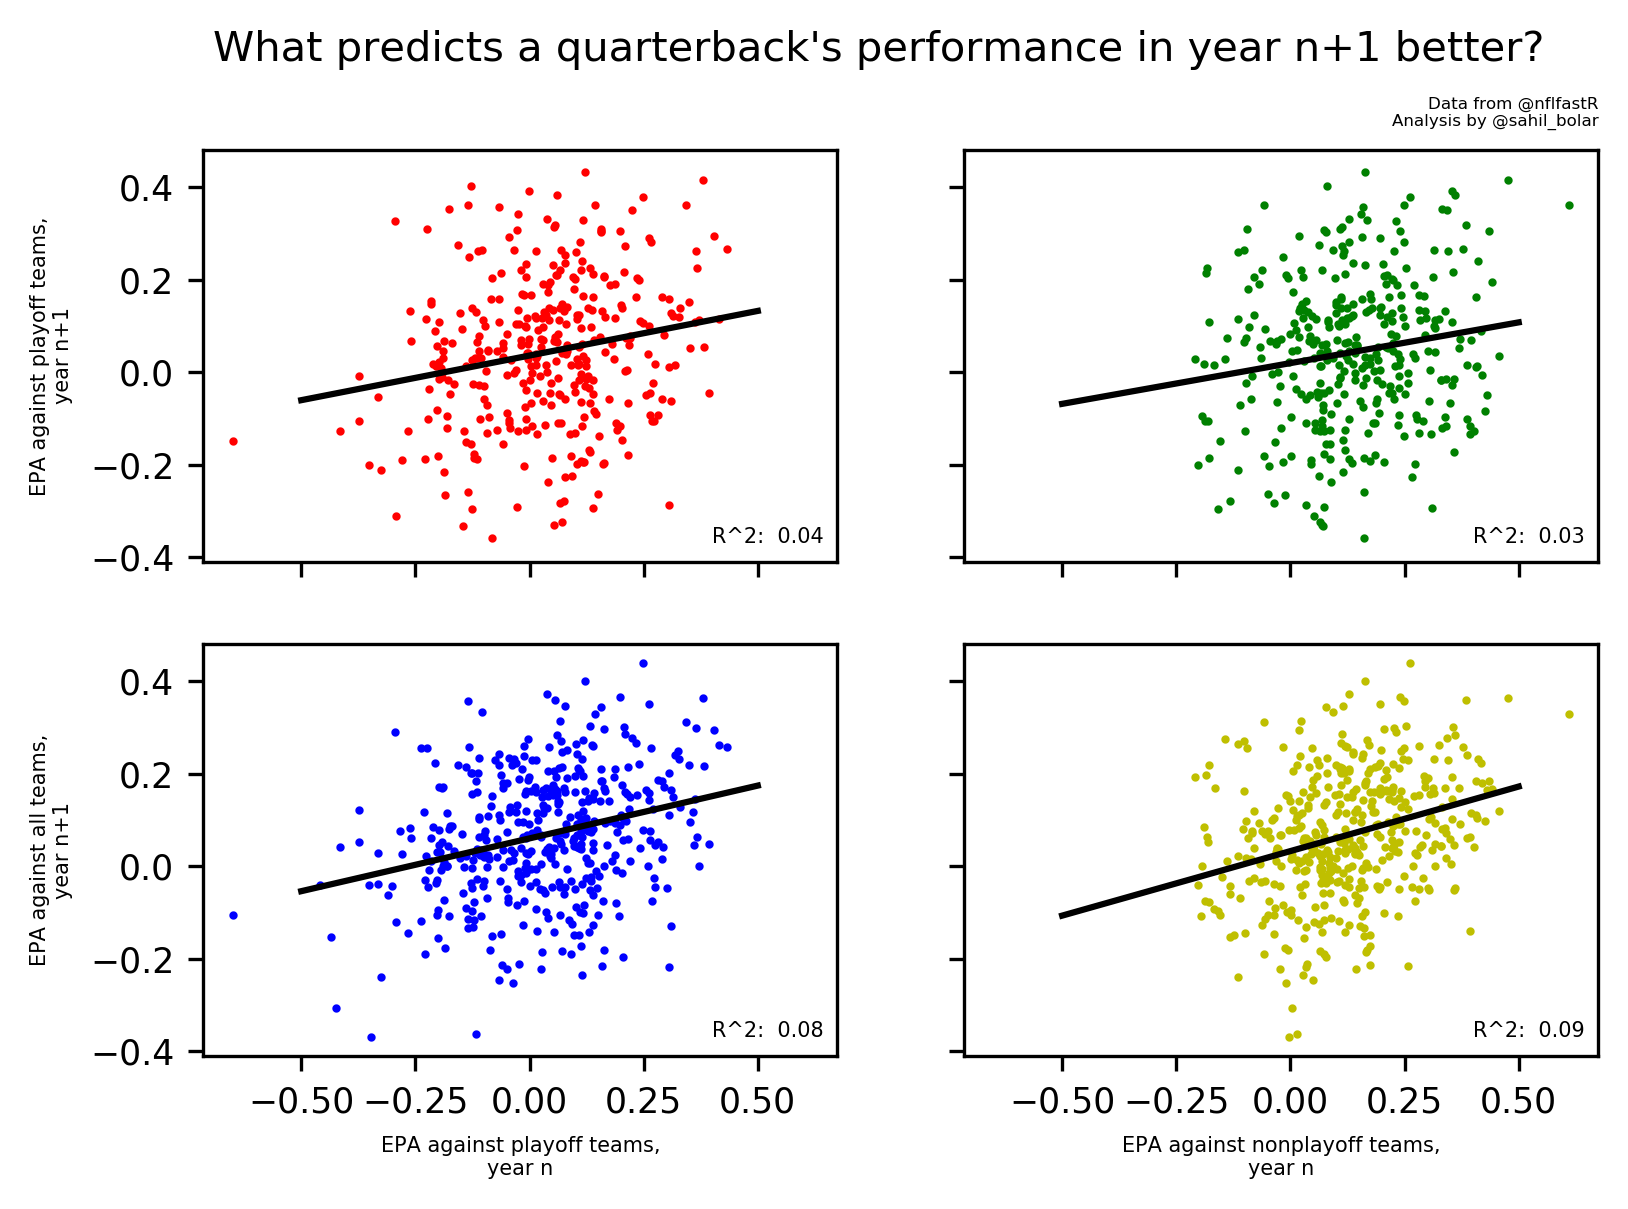

In [191]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
fig.suptitle("What predicts a quarterback's performance in year n+1 better?", fontsize=10)
fig.figsize=(15,10)
fig.dpi = 300
x_linreg = np.linspace(-0.5, 0.5)
text_loc = (.4, -0.37)

axes[0, 0].scatter(x1, y1, 1, 'r')
y_linreg1 = m1 * x_linreg + b1
axes[0, 0].plot(x_linreg, y_linreg1, 'k')
axes[0, 0].set_ylabel('EPA against playoff teams,\nyear n+1', fontsize=5)
axes[0, 0].tick_params(labelsize='small')
axes[0, 0].text(text_loc[0], text_loc[1], f'R^2: {r1 ** 2: 0.2f}', fontsize=5)

axes[0, 1].scatter(x2, y2, 1, 'g')
y_linreg2 = m2 * x_linreg + b2
axes[0, 1].plot(x_linreg, y_linreg2, 'k')
axes[0, 1].text(text_loc[0], text_loc[1], f'R^2: {r2 ** 2: 0.2f}', fontsize=5)

axes[1, 0].scatter(x3, y3, 1, 'b')
y_linreg3 = m3 * x_linreg + b3
axes[1, 0].plot(x_linreg, y_linreg3, 'k')
axes[1, 0].set_ylabel('EPA against all teams,\nyear n+1', fontsize=5)
axes[1, 0].set_xlabel('EPA against playoff teams,\nyear n', fontsize=5)
axes[1, 0].tick_params(labelsize='small')
axes[1, 0].text(text_loc[0], text_loc[1], f'R^2: {r3 ** 2: 0.2f}', fontsize=5)


axes[1, 1].scatter(x4, y4, 1, 'y')
y_linreg4 = m4 * x_linreg + b4
axes[1, 1].plot(x_linreg, y_linreg4, 'k')
axes[1, 1].set_xlabel('EPA against nonplayoff teams,\nyear n', fontsize=5)
axes[1, 1].tick_params(labelsize='small')
axes[1, 1].text(text_loc[0], text_loc[1], f'R^2: {r4 ** 2: 0.2f}', fontsize=5);

plt.figtext(.9, .9, 'Data from @nflfastR\nAnalysis by @sahil_bolar', fontsize=4, horizontalalignment = 'right')

plt.savefig('playoff_yoy_correlation.png')